In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

df = pd.read_csv("cleandata/athletes_and_medalcount_noNaN")
df1 = pd.read_csv("cleandata/athletes_and_medalcount")

In [20]:
df = df[['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'region_x',
       'notes_x', 'Bronze', 'Gold', 'Silver', 'n/a']]
df["Medals"] = df['Bronze'] + df['Silver']+ df['Gold']
df["Attempts"] = df['Bronze'] + df['Silver']+ df['Gold']+ df['n/a']


In [21]:
df1 = df1[['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'region_x',
       'notes_x', 'Bronze', 'Gold', 'Silver', 'n/a']]
df1["Medals"] = df1['Bronze'] + df1['Silver']+ df1['Gold']
df1["Attempts"] = df1['Bronze'] + df1['Silver']+ df1['Gold']+ df1['n/a']

In [22]:
sports_list = df1["Sport"].unique()
r_weight = []
r_height = []
medal_rate = []
num_of_events = []
games = []
competitors = []
weight_avg = []
height_avg = []

In [23]:
for sport in sports_list:
    try:
        df_loop = df
        df_loop = df_loop.loc[df_loop['Sport'] == f'{sport}']
        df_loop = df_loop.groupby(by = 'ID').agg({
            "Height" : "max",
            "Weight" : "max",
            "Medals" : "sum",
            "Attempts" : "sum"
        })
        try:
            df_loop["Medal Rate"] = df_loop["Medals"] / df_loop["Attempts"] *100
        except:
            0
        plt.clf()
        df_loop = df_loop.loc[df_loop["Medals"] >= 1]
        x_val = df_loop["Height"]
        y_val = df_loop["Medals"]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
        regress_values = x_val * slope + intercept
        plt.hist(x_val, bins= 25)
        plt.xlabel('Height')
        plt.ylabel('Medals')
        plt.title("Height vs Medals")
        plt.savefig(f'breakdowns/plot_outputs/{sport}xheight.jpeg')
        r_height.append(rvalue**2)
        height_slope.append(slope)
        plt.clf()
        x_val = df_loop["Weight"]
        y_val = df_loop["Medals"]
        plt.hist(x_val, bins= 25)
        plt.xlabel('Weight')
        plt.ylabel('Medals')
        plt.title("Weight vs Medals")
        plt.savefig(f'breakdowns/plot_outputs/{sport}xweight.jpeg')
        plt.clf()
    except:
        r_height.append(0)
        r_weight.append(0)

    df_loop_sport = df1
    df_loop_sport = df_loop_sport.loc[df_loop_sport['Sport'] == f'{sport}']
    df_loop_sport = df_loop_sport.agg({
                "Medals" : "sum",
                "Attempts" : "sum",
                "Event" : "nunique",
                "Games" : "nunique",
                "ID" : "nunique",
                "Height" : "mean",
                "Weight" : "mean",
            })        
    weight_avg.append(df_loop_sport["Weight"].max())
    height_avg.append(df_loop_sport["Height"].max())
    games.append(df_loop_sport["Games"])
    competitors.append(df_loop_sport["ID"])
    num_of_events.append(df_loop_sport["Event"])
    medal_rate.append(df_loop_sport["Medals"] / df_loop_sport["Attempts"] *100)

<Figure size 432x288 with 0 Axes>

In [24]:
print(len(sports_list))
print(len(height_avg))
print(len(weight_avg))
print(len(medal_rate))
print(len(num_of_events))


66
66
66
66
66


In [25]:
sport_stats = pd.DataFrame({
    "Sport" : sports_list,
    "Medal Rate" : medal_rate,
    "Number of Events" : num_of_events,
    "# of Games Appeared" : games,
    "Olympians Competed": competitors,
    "Height Avg" : height_avg,
    "Weight Avg" : weight_avg
        })
sport_stats = sport_stats.sort_values("Height Avg", ascending = False)
sport_stats.head(5)

,Sport,Medal Rate,Number of Events,# of Games Appeared,Olympians Competed,Height Avg,Weight Avg
0,Basketball,23.809524,2.0,19.0,3413.0,190.869879,85.777053
37,Volleyball,28.466510,2.0,14.0,2503.0,186.994822,78.900214
46,Beach Volleyball,12.765957,2.0,6.0,383.0,186.144954,79.089219
19,Water Polo,27.483099,2.0,27.0,2599.0,184.834648,84.566446
21,Rowing,27.796130,25.0,28.0,7687.0,184.172222,80.035863


In [26]:
sport_stats.to_csv("Sport_lvl_Stats.csv")

In [27]:
sport_stats.corr()

,Medal Rate,Number of Events,# of Games Appeared,Olympians Competed,Height Avg,Weight Avg
Medal Rate,1.000000,-0.355263,-0.548085,-0.301381,0.167255,0.366009
Number of Events,-0.355263,1.000000,0.567980,0.760457,-0.099136,-0.053754
# of Games Appeared,-0.548085,0.567980,1.000000,0.643795,-0.006727,-0.042717
Olympians Competed,-0.301381,0.760457,0.643795,1.000000,0.099971,0.035836
Height Avg,0.167255,-0.099136,-0.006727,0.099971,1.000000,0.762238
Weight Avg,0.366009,-0.053754,-0.042717,0.035836,0.762238,1.000000


In [29]:
sports_data = df.groupby("Sport", as_index=False).agg({
    "Medals" : "sum",
    "Attempts" : "sum",
    "Event" : "nunique",
    "Games" : "nunique",
    "ID" : "nunique",
    "Height" : "mean",
    "Weight" : "mean",
}).sort_values(by = "Medals", ascending= False)
sports_data.head()

,Sport,Medals,Attempts,Event,Games,ID,Height,Weight
3,Athletics,3654,32601,83,29,18351,176.259580,69.249287
44,Swimming,2488,18804,44,28,6483,178.590072,70.588492
33,Rowing,2189,7933,23,28,5395,184.262638,80.035863
25,Ice Hockey,1313,4593,2,23,3093,178.923127,80.810364
24,Hockey,1170,4267,2,21,2812,173.387899,69.169909


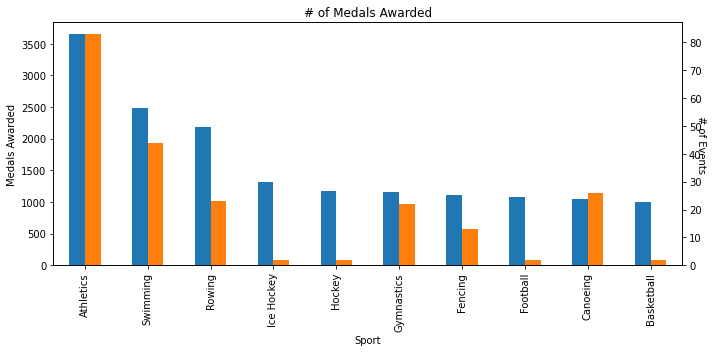

In [70]:
bar_chart_sports = sports_data[["Sport", "Medals", "Event"]]
bar_chart_sports = bar_chart_sports.set_index("Sport")
bar_chart_sports = bar_chart_sports.nlargest(10, "Medals")
bar_chart_sports = bar_chart_sports.sort_values("Medals", ascending=False)
medalsbar_sports = bar_chart_sports.plot(kind="bar", y = ["Medals", "Event"], title=("# of Medals Awarded"), legend = False, secondary_y = "Event", figsize=(10, 5))
medalsbar_sports.set_ylabel("Medals Awarded")
medalsbar_sports.right_ax.set_ylabel("# of Events",rotation = -90)
plt.tight_layout()
plt.savefig("Sports_Bar.png")
plt.show()

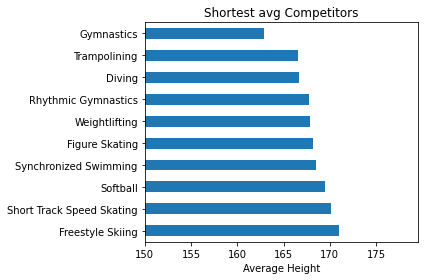

In [49]:
bar_chart_sports = sports_data[["Sport", "Height"]]
bar_chart_sports = bar_chart_sports.set_index("Sport")
bar_chart_sports = bar_chart_sports.nsmallest(10, "Height")
bar_chart_sports = bar_chart_sports.sort_values("Height", ascending=False)
medalsbar_sports = bar_chart_sports.plot(kind="barh", title=("Shortest avg Competitors"), legend = False)
medalsbar_sports.set_ylabel("")
medalsbar_sports.set_xlim(150)
medalsbar_sports.set_xlabel("Average Height")
plt.tight_layout()
plt.savefig("Sports_Bar2.png")
plt.show()

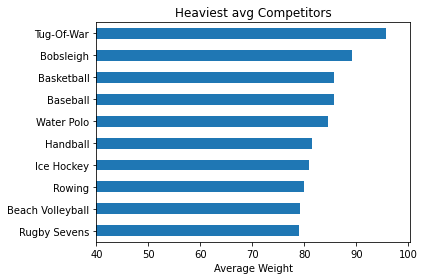

In [56]:
bar_chart_sports = sports_data[["Sport", "Weight"]]
bar_chart_sports = bar_chart_sports.set_index("Sport")
bar_chart_sports = bar_chart_sports.nlargest(10, "Weight")
bar_chart_sports = bar_chart_sports.sort_values("Weight", ascending=True)
medalsbar_sports = bar_chart_sports.plot(kind="barh", title=("Heaviest avg Competitors"), legend = False)
medalsbar_sports.set_ylabel("")
medalsbar_sports.set_xlim(40)
medalsbar_sports.set_xlabel("Average Weight")
plt.tight_layout()
plt.savefig("Sports_Bar3-lrg.png")
plt.show()